In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numexpr as ne
from pandas.tseries.offsets import MonthEnd

# Problem 1

In [ ]:
# Creating DataFrame
sp500 = pd.read_csv('weni7z9lm0qu7sul.csv')

In [ ]:
sp500.shape

In [ ]:
sp500.head()

In [ ]:
sp500.columns

In [ ]:
infla = pd.read_csv('vif61oycy9y6jf7b.csv')

In [ ]:
infla.shape

In [ ]:
infla.head()

In [ ]:
infla.columns

In [ ]:
sp500['caldt'] = pd.to_datetime(sp500['caldt'])
sp500['caldt'] = pd.to_datetime(sp500['caldt'], format="%Y%m") + MonthEnd(0)

In [ ]:
sp500.head()

In [ ]:
infla['caldt'] = pd.to_datetime(infla['caldt'])
infla['caldt'] = infla['caldt'] + MonthEnd(0)

In [ ]:
merged = pd.merge(sp500, infla, on = 'caldt', how = 'inner')
merged.shape

In [ ]:
merged.shape

In [ ]:
merged.columns

In [ ]:
pd.set_option('display.max_columns', None)
merged.head()

In [ ]:
# Calculating nominal returns, not adjusted for inflation
sp500_nominal_returns = merged['vwretd']
sp500_cum = (1 + sp500_nominal_returns).cumprod()
t30_nominal_returns = merged['t30ret']
t30_cum = (1 + t30_nominal_returns).cumprod()
t90_nominal_returns = merged['t90ret']
t90_cum = (1 + t90_nominal_returns).cumprod()
b1_nominal_returns = merged['b1ret']
b1_cum = (1 + b1_nominal_returns).cumprod()
b2_nominal_returns = merged['b1ret']
b2_cum = (1 + b2_nominal_returns).cumprod()
b5_nominal_returns = merged['b5ret']
b5_cum = (1 + b5_nominal_returns).cumprod()
b7_nominal_returns = merged['b7ret']
b7_cum = (1 + b7_nominal_returns).cumprod()
b10_nominal_returns = merged['b10ret']
b10_cum = (1 + b10_nominal_returns).cumprod()
b20_nominal_returns = merged['b20ret']
b20_cum = (1 + b20_nominal_returns).cumprod()
b30_nominal_returns = merged['b30ret']
b30_cum = (1 + b30_nominal_returns).cumprod()

In [ ]:
# Plotting nominal returns with a log-scale on the y-axis. I probably could've used a loop for less lines of code here...
plt.figure(figsize=(10, 5))
plt.title('Nominal Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.grid(True)
plt.semilogy(merged['caldt'], sp500_cum, label='S&P 500', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], t30_cum, label='30 Day Bill', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], t90_cum, label='90 Day Bill', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b1_cum, label='1 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b2_cum, label='2 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b5_cum, label='5 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b7_cum, label='7 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b10_cum, label='10 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b20_cum, label='20 Year Bond', linestyle='-', marker='o', markersize=3)
plt.semilogy(merged['caldt'], b30_cum, label='30 Year Bond', linestyle='-', marker='o', markersize=3)
plt.legend()

In [ ]:
# Calculating real returns, adjusted for inflation
investments = ['vwretd', 't30ret', 't90ret', 'b1ret', 'b2ret', 'b5ret', 'b7ret', 'b10ret', 'b20ret', 'b30ret']
names = {'vwretd': 'S&P500', 't30ret': '30 Day Bill', 't90ret': '90 Day Bill', 'b1ret': '1 Year Bond', 'b2ret': '2 Year Bond', 'b5ret': 
         '5 Year Bond', 'b7ret': '7 Year Bond', 'b10ret': '10 Year Bond', 'b20ret': '20 Year Bond', 'b30ret': '30 Year Bond'}
plt.figure(figsize=(10, 5))
plt.title('Real Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.grid(True)
for i in investments:
    merged[i + ' adjusted'] = 1 + (merged[i] - merged['cpiret'])
    real_returns = merged[i + ' adjusted'].cumprod()
    plt.semilogy(merged['caldt'], real_returns, label= names[i], linestyle='-', marker='o', markersize=3)
plt.legend()
plt.show()    

In [ ]:
# Calculating annualized difference between S&P500 and 30-year bond
ann_ret_sp500 = ((1 + merged['vwretd']).cumprod()) ** (1/1165)
ann_ret_t30 = ((1 + merged['t30ret']).cumprod()) ** (1/1165)
ann_diff = ann_ret_sp500.iloc[-1] - ann_ret_t30.iloc[-1]
print(ann_diff * 100)

The annualized difference between returns on the S&P500 ('vretd') and 30 Year Bonds ('t30ret') is approximately 0.53%. This may be because of the additional risk investors associated with S&P500 stocks versus Treasury Bills, thereby creating an expectation of higher returns. This difference may also occur due to inflation, as inflation affects Treasury Bills more significantly than stocks.

In [ ]:
# Nominal returns over previous 1, 3, and 10 years
# previous 1 year:
for i in investments:
    cum_returns = ((1 +  ))** (1/12)


KeyError: 't30ret nominal over 10'

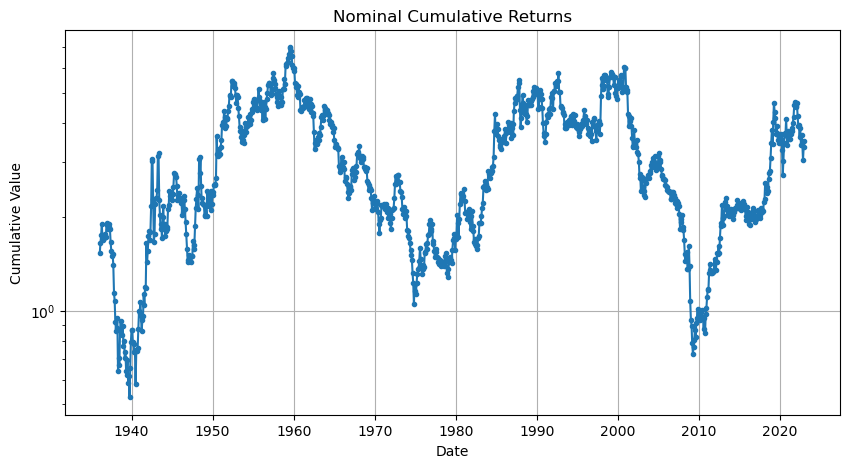

In [50]:
# Nominal returns over previous 10 years:
# previous 10 years
window, start_pos = 120, 121
plt.figure(figsize=(10, 5))
plt.title('Nominal Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.grid(True)
for i in investments:
    merged[i + ' return_fac'] = 1 + merged[i]
    while start_pos <= 1165:
        merged[i + ' nominal over 10'] = merged[i + ' return_fac'].shift().rolling(window = 120).apply(lambda x: x.prod())
        start_pos += 1
    plt.semilogy(merged['caldt'], merged[i + ' nominal over 10'], label= names[i], linestyle='-', marker='o', markersize=3)
plt.show()